In [32]:
#Nutrition Facts for McDonald's Menu
#https://www.kaggle.com/mcdonalds/nutrition-facts
#Using the dataset to analyze the nutrients of every menu item on the Us McDonald's menu

In [1]:
#Importing Csv file
import pandas as pd
import numpy as ny
menuData=pd.read_csv("C:/Users/NEHA/Desktop/menu.csv")


In [3]:
menuData.head(n=2)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,NaN,250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8


In [4]:
# Part A Cleaning and EDA
# Data Cleaning

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns


In [6]:
#1) Are there any missing values

In [7]:
menuData.isnull().sum()
#There are missing values as we can see in respective columns below

Category                           0
Item                               7
Serving Size                     206
Calories                           0
Calories from Fat                  0
Total Fat                          0
Total Fat (% Daily Value)          0
Saturated Fat                      0
Saturated Fat (% Daily Value)      0
Trans Fat                          0
Cholesterol                        0
Cholesterol (% Daily Value)        0
Sodium                             0
Sodium (% Daily Value)             0
Carbohydrates                      0
Carbohydrates (% Daily Value)      0
Dietary Fiber                      0
Dietary Fiber (% Daily Value)      0
Sugars                             0
Protein                            0
Vitamin A (% Daily Value)          0
Vitamin C (% Daily Value)          0
Calcium (% Daily Value)            0
Iron (% Daily Value)               0
dtype: int64

In [10]:
a=sum(menuData['Serving Size'].isnull())
print (a)
b=len(menuData['Serving Size'])
print(b)
a/b*100

206
260


79.230769230769226

In [9]:
#As the ratio of null enteries in the column ['Serving Size']to the total number of rows exceed 70% 
#I think that will be of not much use in my analysis so I consider dropping them

In [11]:
menuData1=menuData.copy()
menuData4=menuData.copy()

In [11]:
#Dropping null values and deleting [Serving Size] column

In [12]:
menuData1.dropna(inplace=True)

In [13]:
menuData1.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [14]:
del menuData1['Serving Size']

In [7]:
menuData1.isnull().sum()

Category                         0
Item                             0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [16]:
# Are there any inappropriate values

In [17]:
menuData1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 253
Data columns (total 23 columns):
Category                         52 non-null object
Item                             52 non-null object
Calories                         52 non-null int64
Calories from Fat                52 non-null int64
Total Fat                        52 non-null float64
Total Fat (% Daily Value)        52 non-null int64
Saturated Fat                    52 non-null float64
Saturated Fat (% Daily Value)    52 non-null int64
Trans Fat                        52 non-null float64
Cholesterol                      52 non-null int64
Cholesterol (% Daily Value)      52 non-null int64
Sodium                           52 non-null int64
Sodium (% Daily Value)           52 non-null int64
Carbohydrates                    52 non-null int64
Carbohydrates (% Daily Value)    52 non-null int64
Dietary Fiber                    52 non-null int64
Dietary Fiber (% Daily Value)    52 non-null int64
Sugars               

In [18]:
menuData1.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,412.500000,137.788462,15.375000,23.692308,6.298077,31.615385,0.230769,66.538462,22.307692,530.000000,...,54.173077,18.019231,1.865385,7.365385,35.288462,14.961538,14.480769,6.173077,23.423077,8.346154
std,272.798676,162.472964,18.105864,27.911301,5.411733,27.287255,0.425436,85.552062,28.595583,653.292566,...,26.282568,8.732384,1.584593,6.556030,29.750819,13.632374,24.930091,19.046611,17.368380,8.212579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,270.000000,35.000000,3.500000,6.000000,2.000000,11.000000,0.000000,15.000000,5.000000,115.000000,...,40.000000,13.000000,1.000000,3.000000,9.750000,8.750000,3.500000,0.000000,8.000000,0.000000
50%,360.000000,105.000000,12.000000,18.500000,5.000000,24.000000,0.000000,35.000000,11.500000,195.000000,...,48.500000,16.000000,1.500000,6.000000,37.000000,13.000000,10.000000,0.000000,20.000000,6.000000
75%,520.000000,200.000000,22.000000,34.250000,10.000000,52.000000,0.125000,75.000000,24.250000,885.000000,...,62.250000,21.000000,3.000000,12.000000,54.500000,20.000000,15.000000,4.000000,35.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,1.500000,295.000000,99.000000,3600.000000,...,139.000000,46.000000,7.000000,28.000000,128.000000,87.000000,170.000000,130.000000,70.000000,25.000000


In [19]:
#There are no inappropriate values in the above dataset.
#The current data is stored in menuData1 and does not require any further cleaning.

In [20]:
# How is the data distributed?

In [21]:
menuData1.head()

,Category,Item,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,300,120,13.0,20,5.0,25,0.0,260,...,31,10,4,17,3,17,10,0,25,15
3,Breakfast,Sausage McMuffin with Egg,450,250,28.0,43,10.0,52,0.0,285,...,30,10,4,17,2,21,15,0,30,15
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",520,270,30.0,47,14.0,68,0.0,250,...,43,14,3,12,4,19,15,8,20,20
10,Breakfast,Sausage Biscuit (Regular Biscuit),430,240,27.0,42,12.0,62,0.0,30,...,34,11,2,6,2,11,0,0,6,15
15,Breakfast,Sausage Biscuit with Egg Whites (Large Biscuit),520,280,32.0,49,13.0,65,0.0,35,...,40,13,3,11,3,18,4,0,8,15


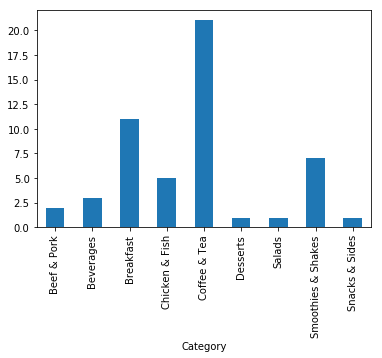

In [22]:
menuData1.groupby('Category')['Item'].count().plot(kind='bar')
#McDonald's provides the most number of items in the Coffee & Tea Category followed by breakfast and so on.

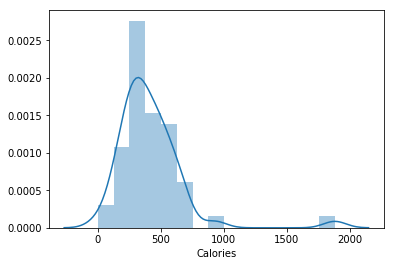

In [26]:
from scipy.stats import norm
sns.distplot(a=menuData1['Calories'])
#The data is normally distributed from 0 to 850 and we can see a outlier at 1875

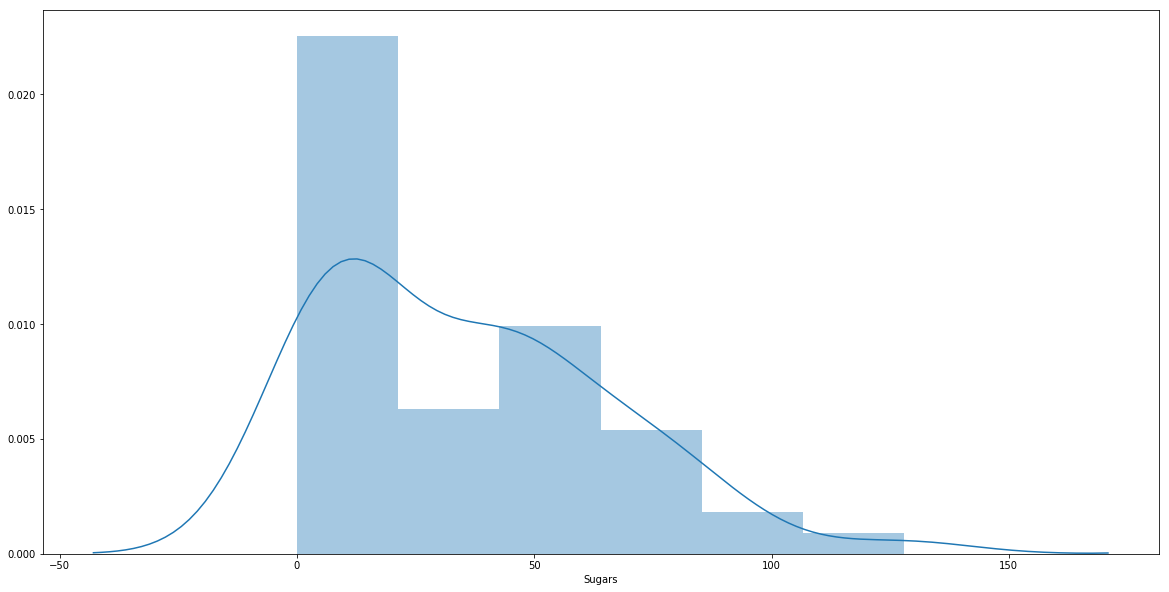

In [102]:
sns.distplot(menuData1['Sugars'])

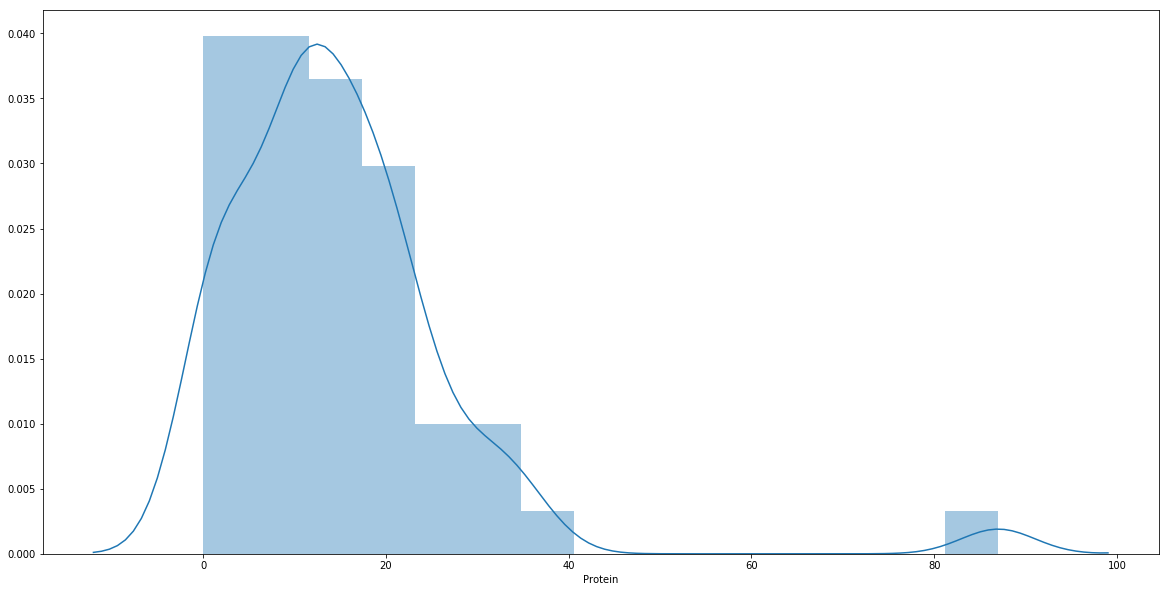

In [103]:
sns.distplot(menuData1['Protein'])
# The data is normally distributed from 0 to 30 and has an outlier at 83

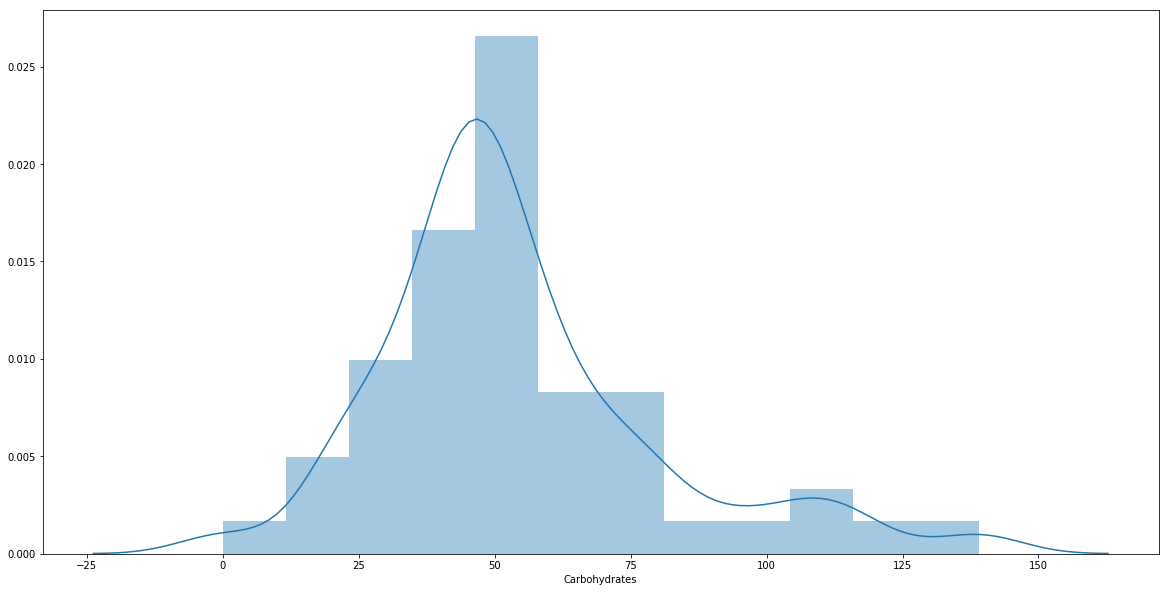

In [104]:
sns.distplot(menuData1['Carbohydrates'])
#The graph is normally distributed from 12 to 87 

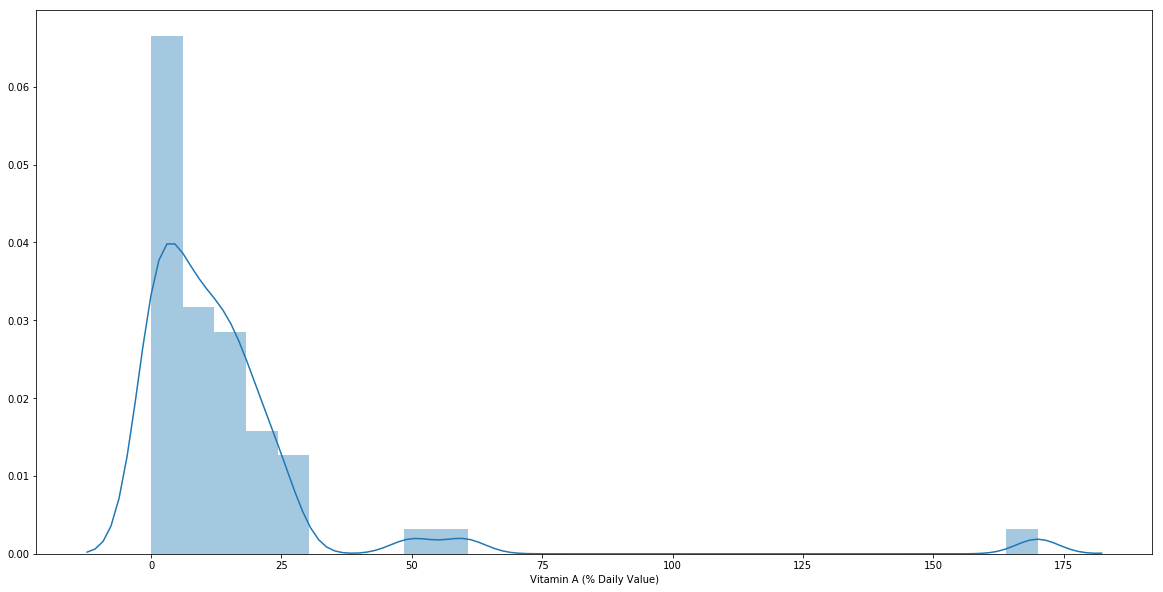

In [105]:
sns.distplot(menuData1['Vitamin A (% Daily Value)'])
#The graph is normally distributed from 0 to 40 with a peak value at 8

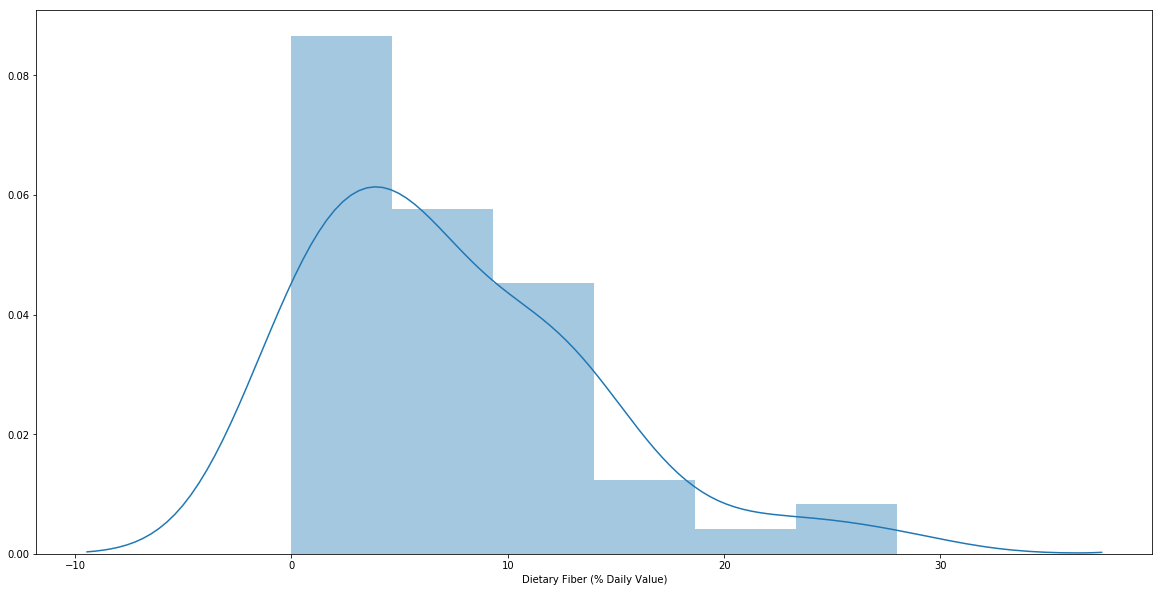

In [108]:
sns.distplot(menuData1['Dietary Fiber (% Daily Value)'])
#The graph is normally distributed from 0 to 20

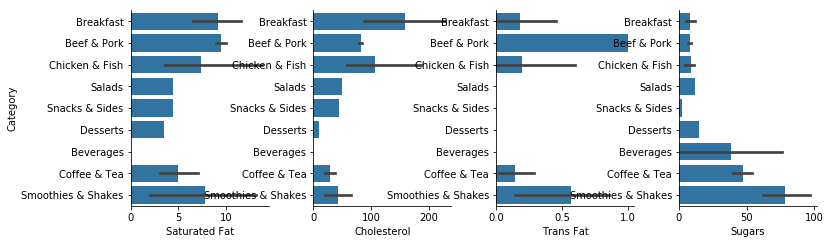

In [109]:
#Plotting
#The nutritional metrics like Saturated fat,Trans fat, Cholesterol, Sugars have a negative effect on health of human being
# while other nutritional contents like Dietary fiber, Carbohydrates, Proteins, Vitamin A, Vitamin C ,Iron are essential.
g = sns.PairGrid(menuData1,
                 x_vars=["Saturated Fat", "Cholesterol", "Trans Fat","Sugars"],
                 y_vars=["Category"],
                 aspect=.75, size=3.5)
g.map(sns.barplot)
#Breakfast has the highest amount of cholesterol,as cholesterol is present in animal food products
#we can say that breakfast mostly contains non vegeterian food
#Beef & Pork has the highest amount of saturated fat and trans fat
#Smoothies & Shakes has huge amount of sugars as fruits naturally contain sugar and 
#alongwith it artifical sugar and icecream is added to enhance its sweetness which could be harmful to our system.

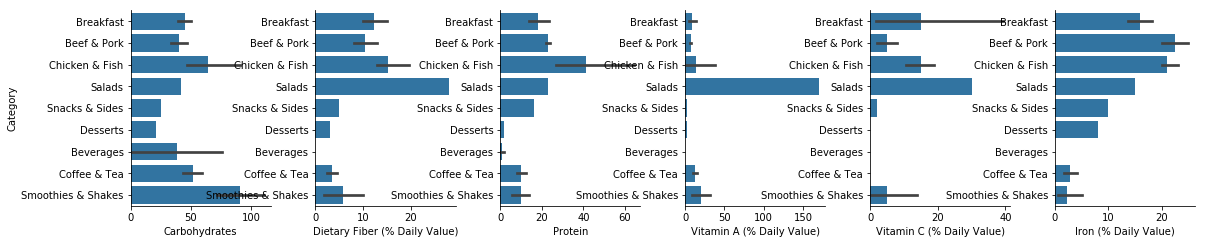

In [110]:
g = sns.PairGrid(menuData1,
                 x_vars=["Carbohydrates", "Dietary Fiber (% Daily Value)", "Protein","Vitamin A (% Daily Value)","Vitamin C (% Daily Value)","Iron (% Daily Value)"],
                 y_vars=["Category"],
                 aspect=.75, size=3.5)
g.map(sns.barplot)
#Smoothies & Shakes contain high amount of carbohydrates indicating that it contains large amount of fruits,veggie,grains and beans
#Salads are rich source of Dietary Fiber,Vitamin A and Vitamin C
#Chicken & Fish constitute considerable amount of Protein and Iron


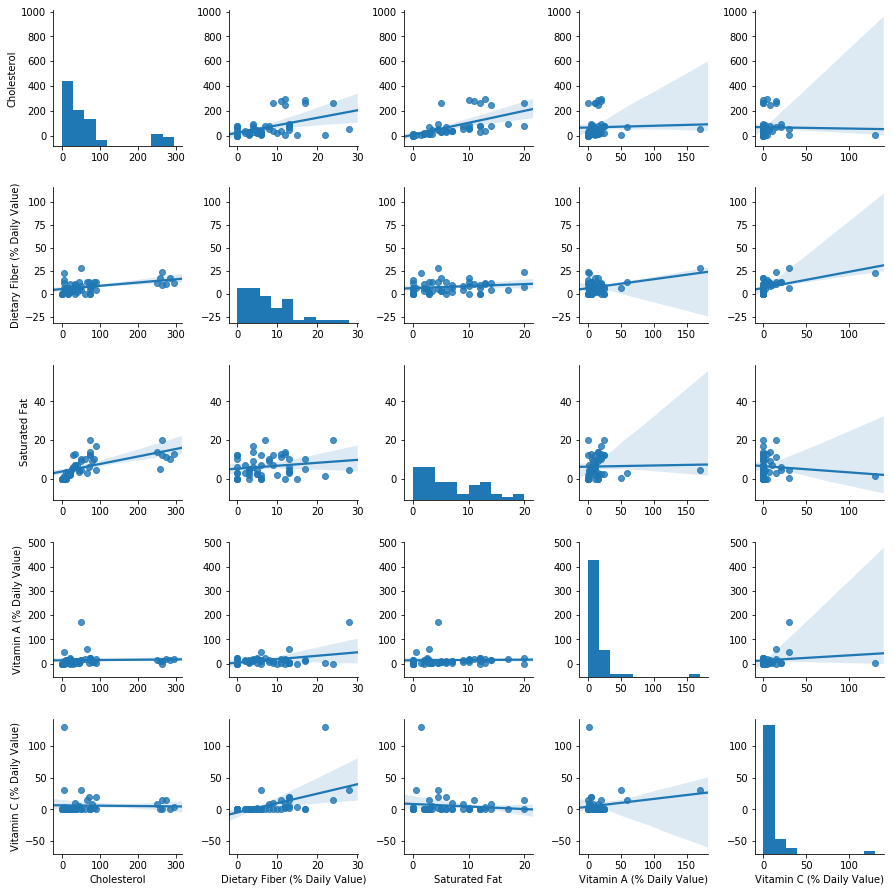

In [16]:
sns.pairplot(menuData1,vars=["Cholesterol", "Dietary Fiber (% Daily Value)", "Saturated Fat","Vitamin A (% Daily Value)","Vitamin C (% Daily Value)"],kind ='reg')

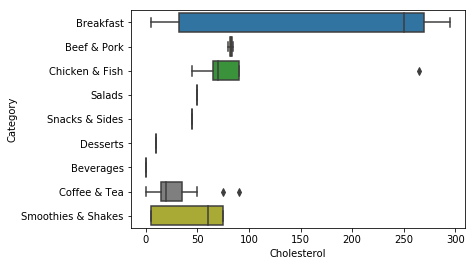

In [15]:

 #<----Analysis of most non nutritious food items from each category ------->

sns.boxplot(y="Category", x="Cholesterol", data=menuData1);
plt.rcParams['figure.figsize'] = (40,28)

#Breakfast has many food items in the McDonald's menu which have high level of Cholesterol
#Also we can see an outlier in Chicken & Fish Category and Coffee & Tea Category.


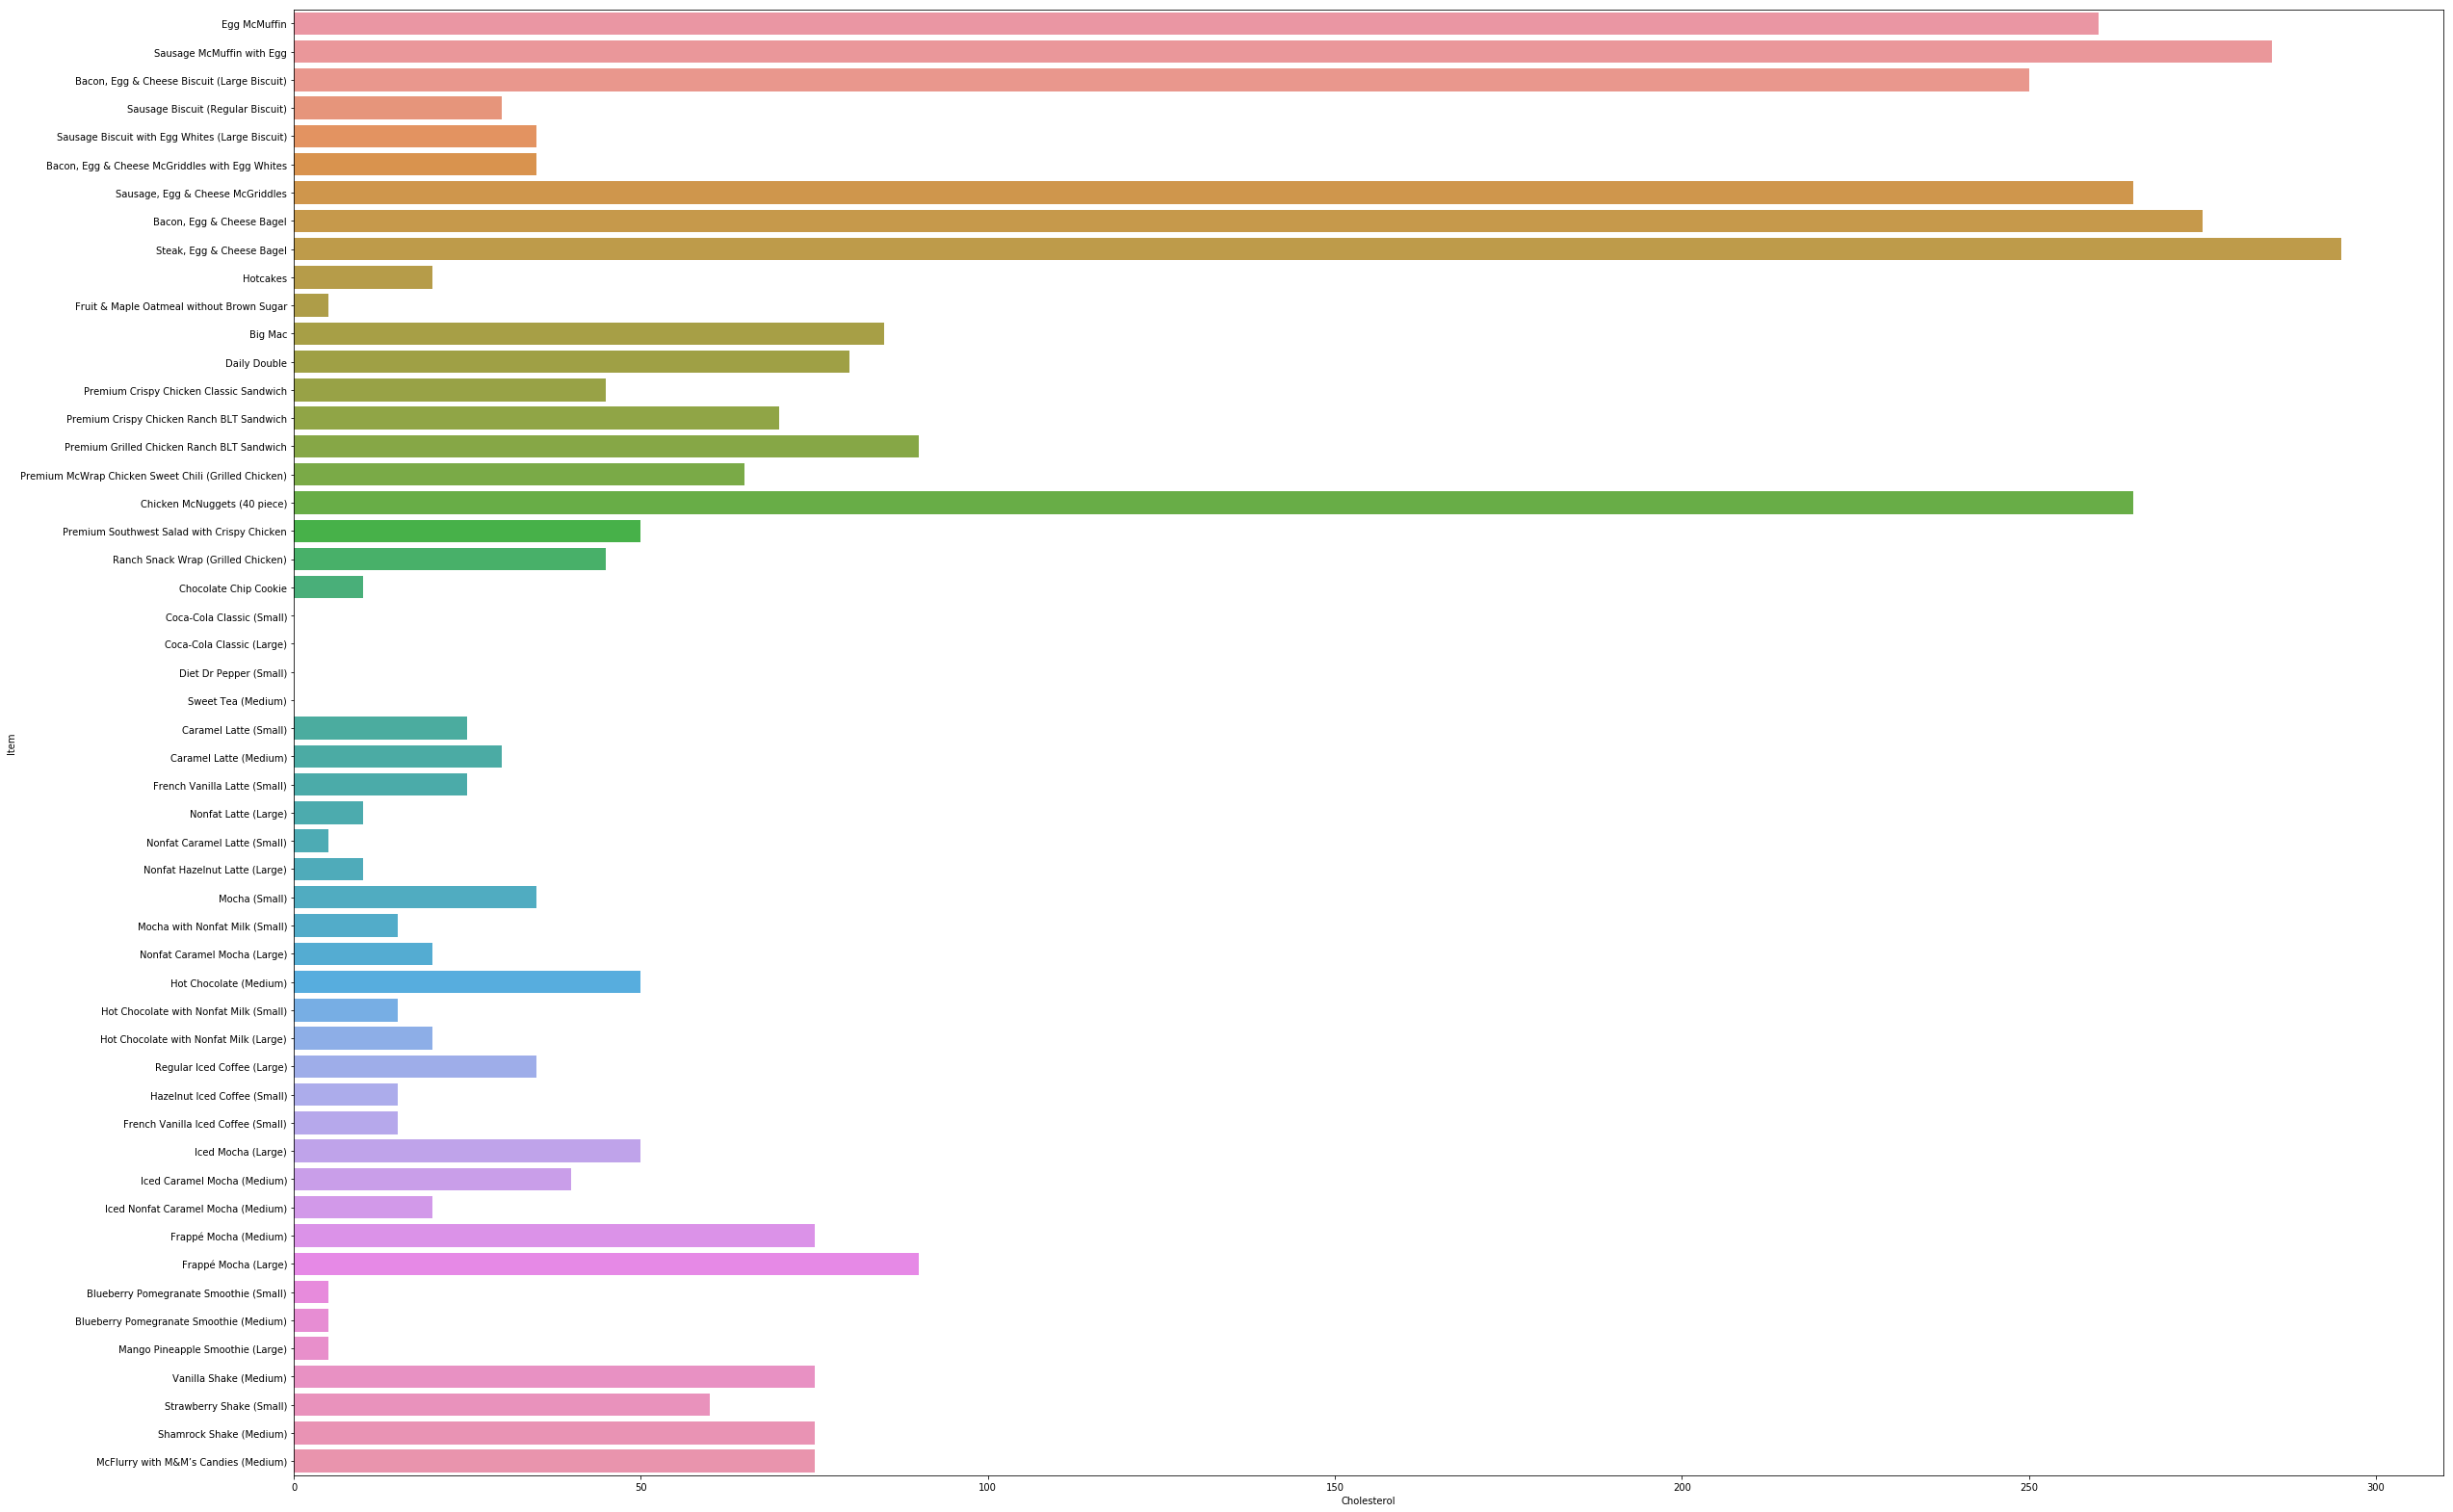

In [114]:
#So lets find out which food items in breakfast contain huge amount of cholesterol which should be avoided by customers
sns.barplot(x="Cholesterol",y="Item",data= menuData1)
#Steak,Egg & Cheese Bagel food item in the breakfast category alongwith other items like Sausage McMufffin with Egg 
#contain high amount of cholesterol as we can see that it contains a lot of animal food products.


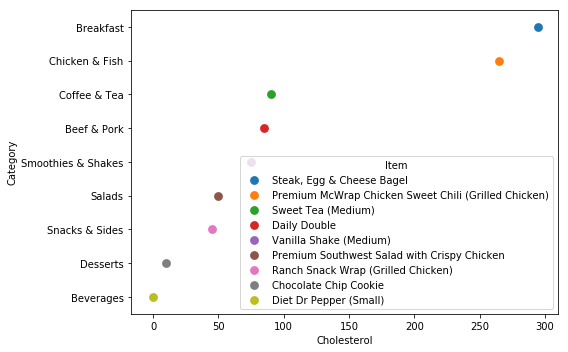

In [116]:
#Finding food item in each category with highest Cholesterol level
Max_Cho = menuData1.groupby('Category').max().sort_values('Cholesterol',ascending=False)
sns.pointplot(data =Max_Cho, y= Max_Cho.index,x = 'Cholesterol',hue ='Item',size =5 )
plt.tight_layout()
plt.rcParams['figure.figsize'] = (8,5)
#So in Breakfast Category Steak,Egg & Cheese Bagel should be avoided as it contains high cholesterol value of 292
#Also in Chicken & fish Category Premium McWrap Chicken Sweet Chilli contains 265 value of cholesterol

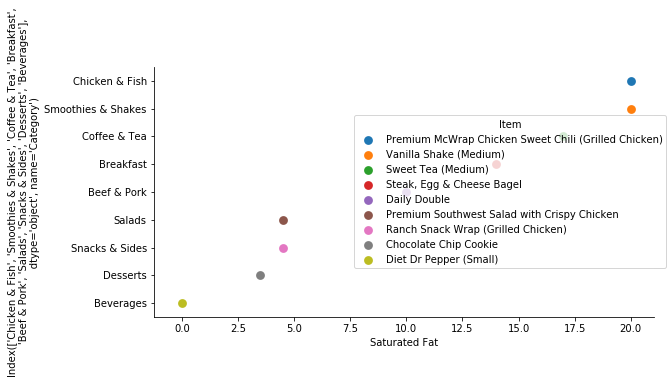

In [117]:
#Finding food item in each category with highest Saturated Fat
Max_SatFat = menuData1.groupby('Category').max().sort_values('Saturated Fat',ascending=False)
sns.factorplot(data =Max_SatFat, y= Max_SatFat.index,x = 'Saturated Fat',hue ='Item',size =5 )
plt.tight_layout()
plt.rcParams['figure.figsize'] = (10,5)
#Here again Premium McWrap Chicken Sweet Chilli has the highest amount of saturated fat (20) alongwith Vanilla Shake
#Steak,Egg & Cheese Bagel also has considerable amount of saturated fat (16)

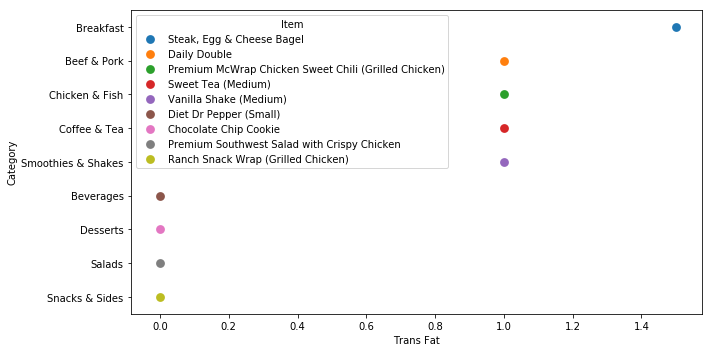

In [118]:
/#Finding food item in each category with highest amount of Trans Fat
Max_TransFat = menuData1.groupby('Category').max().sort_values('Trans Fat',ascending=False)
sns.pointplot(data =Max_TransFat, y= Max_TransFat.index,x = 'Trans Fat',hue ='Item',size =5 )
plt.tight_layout()
plt.rcParams['figure.figsize'] = (12,5)
# Steak,Egg & Cheese Bagel has the highest amount of Trans Fat (16) followed by Premium McWrap Chicken Sweet Chilli(10) 

In [95]:
#From the above 3 graphs it can be concluded that Steak,Egg & Cheese Bagel from Breakfast Category and 
#Premium McWrap Chicken Sweet Chilli from Chicken & Fish Category are non nutritious food items has compared to the rest of them
#as they contain high level of Cholesterol, Saturated Fat and Trans Fat.

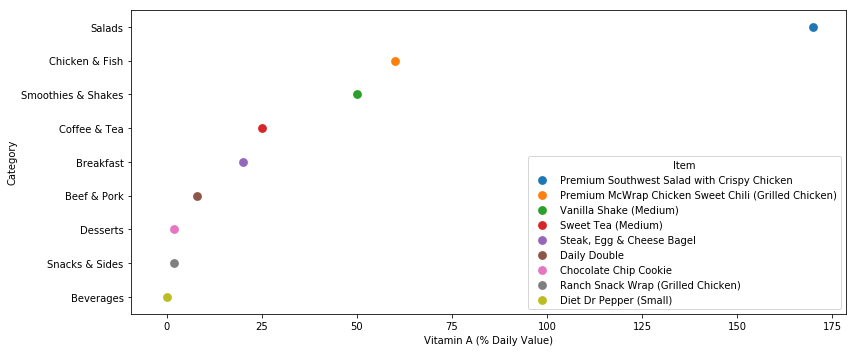

In [119]:
#<----Analysis of most nutritious food items from each category ------->


#Finding food item in each category with highest amount of Vitamin A
Max_VitA = menuData1.groupby('Category').max().sort_values('Vitamin A (% Daily Value)',ascending=False)
sns.pointplot(data =Max_VitA, y= Max_VitA.index,x = 'Vitamin A (% Daily Value)',hue ='Item',size =5 )
plt.tight_layout()
plt.rcParams['figure.figsize'] = (12,5)
#Premium Southwest Salad with Cripsy Chicken from Salads Category is a rich source of Vitamin A  

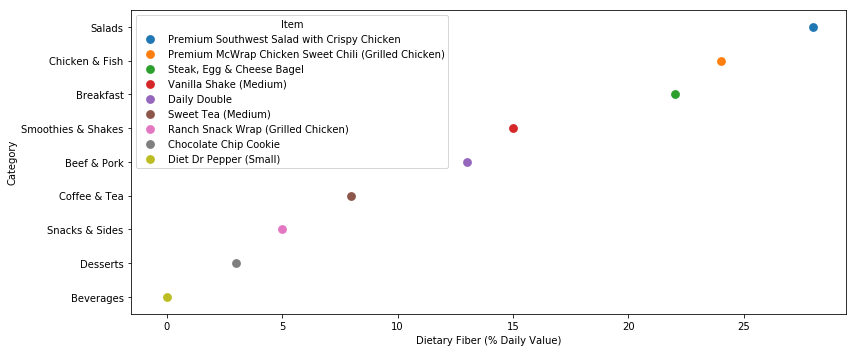

In [120]:
#Finding food item in each category with highest amount of Dietary Fiber
Max_C = menuData1.groupby('Category').max().sort_values('Dietary Fiber (% Daily Value)',ascending=False)
sns.pointplot(data =Max_C, y= Max_C.index,x = 'Dietary Fiber (% Daily Value)',hue ='Item',size =5 )
plt.tight_layout()
plt.rcParams['figure.figsize'] = (12,5)
#Premium Southwest Salad with Cripsy Chicken from Salads Category is a rich source of Dietary Fiber 

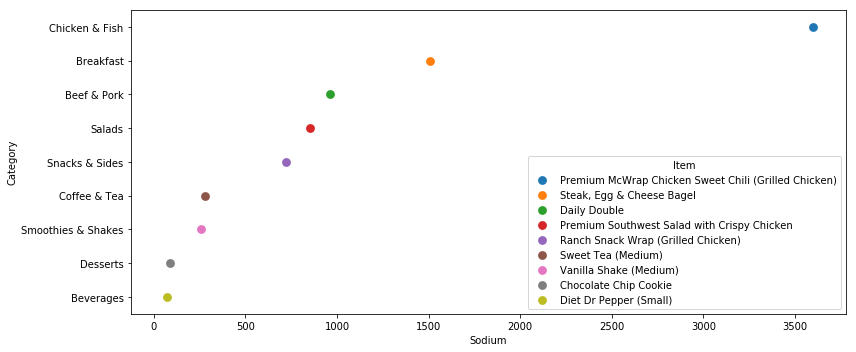

In [121]:
#Finding food item in each category with highest amount of Dietary Fiber
Max_C = menuData1.groupby('Category').max().sort_values('Sodium',ascending=False)
sns.pointplot(data =Max_C, y= Max_C.index,x = 'Sodium',hue ='Item',size =5 )
plt.tight_layout()
plt.rcParams['figure.figsize'] = (12,5)
#Premium Southwest Salad with Cripsy Chicken from Salads Category is a rich source of Dietary Fiber 

In [ ]:
#Finding food item in each category with highest amount of Vitamin C
Max_VitC = menuData1.groupby('Category').max().sort_values('Vitamin C (% Daily Value)',ascending=False)
sns.pointplot(data =Max_VitC, y= Max_VitC.index,x = 'Vitamin C (% Daily Value)',hue ='Item',size =5 )
plt.tight_layout()
plt.rcParams['figure.figsize'] = (12,5)
#Premium Southwest Salad with Cripsy Chicken from Salads Category is also a rich source of Vitamin C 

In [ ]:
#So a conclusion can be drawn that Premium Southwest Salad with Crispy Chicken from Salads Category is a nutritious food item 
#with high contents of Vitamin A, Vitamin C and Dietary Fiber.

In [ ]:
#In general,
#Breakfast is rich source of Cholesterol, Saturated Fat, Iron
#Beef & Pork has high content of Iron, Saturated Fat and Trans Fat
#Chicken & Fish has high values of Saturated Fat, Cholesterol, Vitamin C, Iron
#Salads are rich source of Dietary Fiber, Vitamin A, Vitamin C and Iron
#Smoothies & Shakes have Carbohydrates, Sugars, Saturated Fat

In [3]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = out1[['Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Protein','Carbohydrates','Dietary Fiber','Cholesterol','Saturated Fat','Sugars']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)
plt.rcParams['figure.figsize'] = (20,10)
#Vitamin C is negatively correlated with/ Cholesterol,Saturated Fiber,Sugars
#Protein is negatively correlated with Sugars
#Dietary Fiber is negatively correlated with Sugars
#Cholesterol is negatively related with Vitamin C and Sugars
#Saturated Fat is negatively correlated with Vitamin C
#Sugars is negatively correlated with Vitamin C,Proteins,Dietary Fiber,Cholesterol.

NameError: name 'out1' is not defined